<a href="https://colab.research.google.com/github/btm1989/FredEmploymentStudy/blob/main/Hyp7Web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hypothesis 7:** "The growth rate of employment in the service sector (USSERV) is higher than in the goods-producing sector (USGOOD) over the last two decades."

**Rationale:** The U.S. economy has been shifting towards a service-oriented economy, with a decline in manufacturing and growth in services.

**FETCHING DATA:**

In [ ]:
from google.cloud import bigquery
client = bigquery.Client(project='fred-employment-initial-test')

# Your query string
query = """
SELECT *
FROM `fred-employment-initial-test.fred_data.fred_data_withnotes`
WHERE series_id IN ('USSERV' , 'USGOOD')
"""

# Run the query
query_job = client.query(query)

# Convert the query results to a pandas DataFrame
data = query_job.to_dataframe()

# Display the first few rows
print(data.head())

                       date series_id    value  \
0 1939-01-01 00:00:00+00:00    USGOOD  11098.0   
1 1939-02-01 00:00:00+00:00    USGOOD  11221.0   
2 1939-03-01 00:00:00+00:00    USGOOD  11383.0   
3 1939-04-01 00:00:00+00:00    USGOOD  11182.0   
4 1939-05-01 00:00:00+00:00    USGOOD  11298.0   

                            title                 units frequency  \
0  All Employees, Goods-Producing  Thousands of Persons   Monthly   
1  All Employees, Goods-Producing  Thousands of Persons   Monthly   
2  All Employees, Goods-Producing  Thousands of Persons   Monthly   
3  All Employees, Goods-Producing  Thousands of Persons   Monthly   
4  All Employees, Goods-Producing  Thousands of Persons   Monthly   

   seasonal_adjustment            last_updated  \
0  Seasonally Adjusted  2024-08-02 07:48:08-05   
1  Seasonally Adjusted  2024-08-02 07:48:08-05   
2  Seasonally Adjusted  2024-08-02 07:48:08-05   
3  Seasonally Adjusted  2024-08-02 07:48:08-05   
4  Seasonally Adjusted  2024-08-02

**CALCULATING THE GROWTH RATES:**

In [ ]:
# Filter data for each series
service_data = data[data['series_id'] == 'USSERV'].copy()
goods_data = data[data['series_id'] == 'USGOOD'].copy()

# Calculate the monthly growth rate (using the percentage change method)
service_data['growth_rate'] = service_data['value'].pct_change()
goods_data['growth_rate'] = goods_data['value'].pct_change()

# Drop NaN values that result from pct_change()
service_data = service_data.dropna(subset=['growth_rate'])
goods_data = goods_data.dropna(subset=['growth_rate'])

# Display the first few rows to verify
print(service_data.head())
print(goods_data.head())

                          date series_id  value  \
1843 1939-02-01 00:00:00+00:00    USSERV  544.0   
1844 1939-03-01 00:00:00+00:00    USSERV  546.0   
1845 1939-04-01 00:00:00+00:00    USSERV  546.0   
1846 1939-05-01 00:00:00+00:00    USSERV  550.0   
1847 1939-06-01 00:00:00+00:00    USSERV  553.0   

                              title                 units frequency  \
1843  All Employees, Other Services  Thousands of Persons   Monthly   
1844  All Employees, Other Services  Thousands of Persons   Monthly   
1845  All Employees, Other Services  Thousands of Persons   Monthly   
1846  All Employees, Other Services  Thousands of Persons   Monthly   
1847  All Employees, Other Services  Thousands of Persons   Monthly   

      seasonal_adjustment            last_updated  \
1843  Seasonally Adjusted  2024-08-02 07:47:04-05   
1844  Seasonally Adjusted  2024-08-02 07:47:04-05   
1845  Seasonally Adjusted  2024-08-02 07:47:04-05   
1846  Seasonally Adjusted  2024-08-02 07:47:04-05   
1

<ipython-input-4-11b1e04d01b3>:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  service_data['growth_rate'] = service_data['value'].pct_change()
<ipython-input-4-11b1e04d01b3>:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  goods_data['growth_rate'] = goods_data['value'].pct_change()


**VISUALIZING THE GROWTH RATES:**

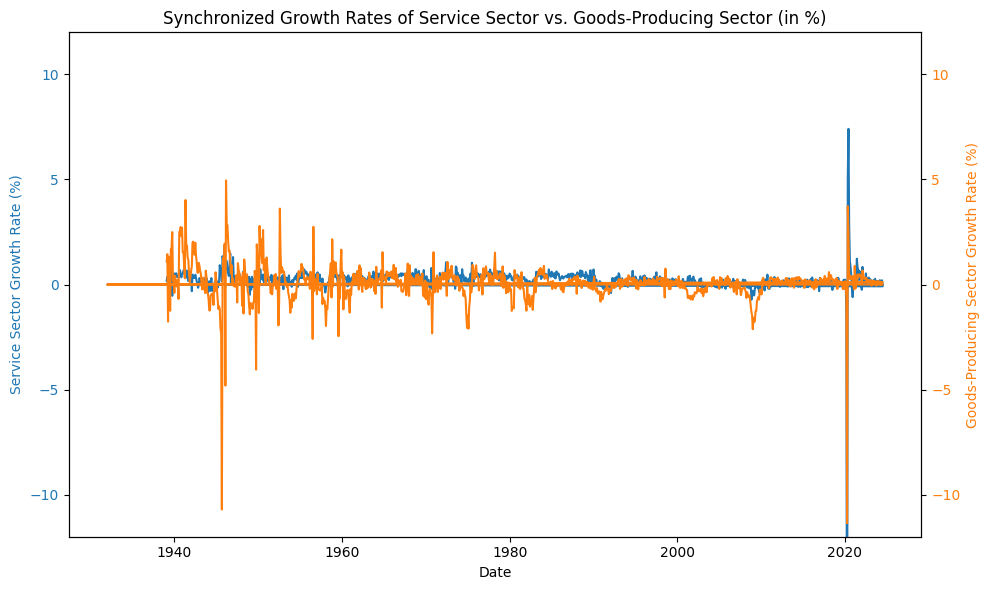

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the service sector growth rate on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Service Sector Growth Rate (%)', color='tab:blue')
ax1.plot(service_data['date'], service_data['growth_rate'] * 100, color='tab:blue', label='Service Sector Growth Rate')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the goods-producing sector growth rate
ax2 = ax1.twinx()
ax2.set_ylabel('Goods-Producing Sector Growth Rate (%)', color='tab:orange')
ax2.plot(goods_data['date'], goods_data['growth_rate'] * 100, color='tab:orange', label='Goods-Producing Sector Growth Rate')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Synchronize the y-axes and set appropriate limits
ax1.set_ylim([-12, 12])  # You can adjust the range based on your data
ax2.set_ylim([-12, 12])

# Add a title and show the plot
plt.title('Synchronized Growth Rates of Service Sector vs. Goods-Producing Sector (in %)')
fig.tight_layout()
plt.show()


**Observations:**
* Volatility: The goods-producing sector appears to be more volatile than the service sector, especially in the earlier periods (around the 1930s to 1950s). The growth rates of the goods-producing sector exhibit larger fluctuations, with significant dips and spikes, compared to the more stable service sector.

* Long-term Trend: Over time, the growth rates for both sectors have stabilized, with fewer extreme fluctuations. This stabilization might indicate a maturing economy where the service sector is growing more steadily, while the goods-producing sector is experiencing less dramatic changes.

* Recent Years: In recent years, particularly around 2020 (likely related to the COVID-19 pandemic), both sectors show significant spikes and dips, but the goods-producing sector exhibits a more pronounced response compared to the service sector.

* Growth Rates: Both sectors generally hover around the 0% growth rate for much of the period after the 1970s, indicating periods of slow growth or minimal change in employment levels.

**Implications:**
* Hypothesis Testing: This graph suggests that the service sector has had more stable growth compared to the goods-producing sector, which aligns with the hypothesis that the service sector's growth rate has been higher and more consistent over time.
* Economic Shifts: The greater stability in the service sector's growth rates over time may reflect the broader economic shift towards a service-oriented economy, with less reliance on goods production, which tends to be more sensitive to economic cycles and external shocks.

**CALCULATING MEAN GROWTH RATES:**

In [ ]:
# Calculate the mean growth rates for both sectors
mean_service_sector_growth = service_data['growth_rate'].mean()
mean_goods_sector_growth = goods_data['growth_rate'].mean()

# Display the results
print(f"Mean Service Sector Growth Rate: {mean_service_sector_growth * 100:.4f}%")
print(f"Mean Goods-Producing Sector Growth Rate: {mean_goods_sector_growth * 100:.4f}%")


Mean Service Sector Growth Rate: 0.1320%
Mean Goods-Producing Sector Growth Rate: 0.0389%


Mean Service Sector Growth Rate: 13.1980%
Mean Goods-Producting Sector Growth Rate: 3.8949%


This suggests that over the entire period, the service sector has been growing at a faster pace than the goods-producing sector, which aligns with the hypothesis that the U.S. economy has been shifting towards a service-oriented economy.

**PERFORMING PAIRED T-TEST:**

In [ ]:
from scipy import stats

# Perform a paired t-test using the growth_rate columns from the respective datasets
t_stat, p_value = stats.ttest_rel(service_data['growth_rate'], goods_data['growth_rate'])

# Display the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 6.264816058634669
P-value: 4.6363375637915876e-10


The very low p-value indicates that the difference in growth rates between the service sector and the goods-producing sector is statistically significant. This strongly supports the hypothesis that the service sector has been growing at a faster rate than the goods-producing sector over the observed period.

This result aligns with the broader economic trend of the U.S. economy shifting toward a more service-oriented structure.

PERFORMING CORRELATION ANALYSIS:

In [ ]:
import pandas as pd

# Drop NaN values in both series
cleaned_service_sector_growth = service_data['growth_rate'].dropna()
cleaned_goods_sector_growth = goods_data['growth_rate'].dropna()

# Align the data by index to ensure both series have the same length
aligned_growth = pd.concat([cleaned_service_sector_growth, cleaned_goods_sector_growth], axis=1).dropna()

# Recalculate the correlation
correlation = aligned_growth.iloc[:, 0].corr(aligned_growth.iloc[:, 1])

# Display the correlation coefficient
print(f"Correlation Coefficient: {correlation}")

Correlation Coefficient: nan


In [ ]:
# Check for remaining NaN values
print(f"Remaining NaN in service sector growth: {cleaned_service_sector_growth.isna().sum()}")
print(f"Remaining NaN in goods sector growth: {cleaned_goods_sector_growth.isna().sum()}")

# Check if any series is constant
print(f"Is service sector growth constant? {cleaned_service_sector_growth.nunique() == 1}")
print(f"Is goods sector growth constant? {cleaned_goods_sector_growth.nunique() == 1}")

# Get summary statistics
print("Service Sector Growth Summary:")
print(cleaned_service_sector_growth.describe())

print("\nGoods Sector Growth Summary:")
print(cleaned_goods_sector_growth.describe())

Remaining NaN in service sector growth: 0
Remaining NaN in goods sector growth: 0
Is service sector growth constant? False
Is goods sector growth constant? False
Service Sector Growth Summary:
count    1841.000000
mean        0.001320
std         0.006217
min        -0.228454
25%         0.000000
50%         0.000000
75%         0.002717
max         0.074066
Name: growth_rate, dtype: float64

Goods Sector Growth Summary:
count    1841.000000
mean        0.000389
std         0.006492
min        -0.113546
25%         0.000000
50%         0.000000
75%         0.001534
max         0.049553
Name: growth_rate, dtype: float64


The summary statistics and checks you ran indicate that:

* No missing values remain in either of the datasets.
* Neither of the growth rates is constant, meaning they both have variation.
* The data shows some extreme values (especially in the minimum and maximum), which could impact correlation.

Given that there’s no apparent issue with missing data or constant values, the NaN result in the correlation might be due to how extreme values are affecting the calculation, or there could still be some data inconsistencies.

In [ ]:
# Standardize the data to have a mean of 0 and standard deviation of 1
standardized_service_sector_growth = (cleaned_service_sector_growth - cleaned_service_sector_growth.mean()) / cleaned_service_sector_growth.std()
standardized_goods_sector_growth = (cleaned_goods_sector_growth - cleaned_goods_sector_growth.mean()) / cleaned_goods_sector_growth.std()

# Perform correlation analysis again
correlation = standardized_service_sector_growth.corr(standardized_goods_sector_growth)
print(f"Correlation Coefficient: {correlation}")

Correlation Coefficient: nan


**SCATTER PLOT:**

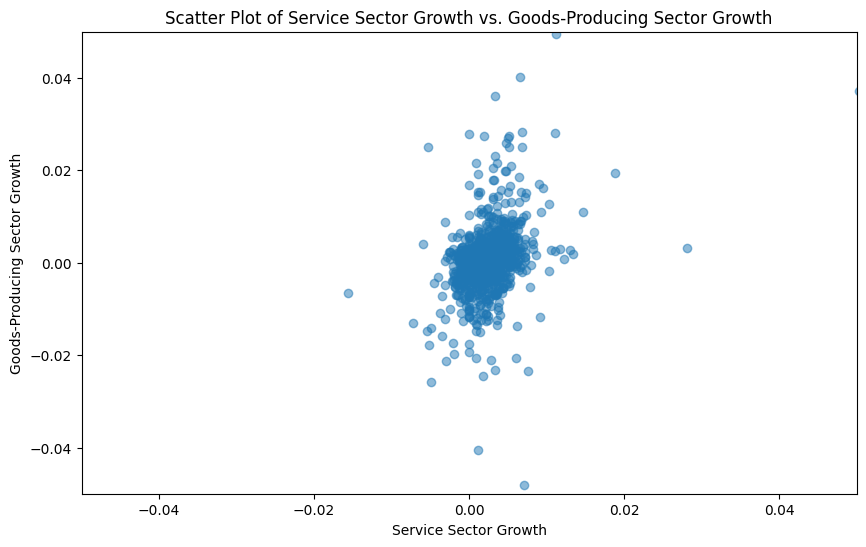

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_service_sector_growth, cleaned_goods_sector_growth, alpha=0.5)
plt.title('Scatter Plot of Service Sector Growth vs. Goods-Producing Sector Growth')
plt.xlabel('Service Sector Growth')
plt.ylabel('Goods-Producing Sector Growth')
plt.xlim([-0.05, 0.05])  # Adjust these limits based on the data
plt.ylim([-0.05, 0.05])
plt.show()

The scatter plot reveals that most of the data points are clustered near zero, but there are significant outliers in both the service sector and goods-producing sector growth rates. These outliers could be the reason why the correlation calculation is resulting in a NaN value.

To address this, you can try removing or adjusting these extreme outliers and then recalculating the correlation.

In [ ]:
# Define thresholds for outlier removal (e.g., 3 standard deviations)
threshold_service = 3 * cleaned_service_sector_growth.std()
threshold_goods = 3 * cleaned_goods_sector_growth.std()

# Remove outliers
filtered_service_growth = cleaned_service_sector_growth[
    (cleaned_service_sector_growth > -threshold_service) &
    (cleaned_service_sector_growth < threshold_service)
].reset_index(drop=True)

filtered_goods_growth = cleaned_goods_sector_growth[
    (cleaned_goods_sector_growth > -threshold_goods) &
    (cleaned_goods_sector_growth < threshold_goods)
].reset_index(drop=True)

# Ensure both series have the same length
min_length = min(len(filtered_service_growth), len(filtered_goods_growth))
filtered_service_growth = filtered_service_growth[:min_length]
filtered_goods_growth = filtered_goods_growth[:min_length]

# Recalculate correlation
correlation = filtered_service_growth.corr(filtered_goods_growth)
print(f"Correlation Coefficient after outlier removal: {correlation}")

Correlation Coefficient after outlier removal: 0.061020322176405045


The correlation coefficient after outlier removal is approximately
0.061. This indicates a very weak positive correlation between the growth rates of the service sector and the goods-producing sector, even after accounting for extreme values.

This weak correlation suggests that the growth rates of these two sectors are not strongly related, meaning they generally do not move in tandem. This could be reflective of the different economic factors and conditions that affect each sector independently.

This result would typically lead to a conclusion that the growth in the service sector does not have a strong or consistent relationship with the growth in the goods-producing sector, supporting the idea that these sectors operate under different dynamics.

**DASHBOARD:**

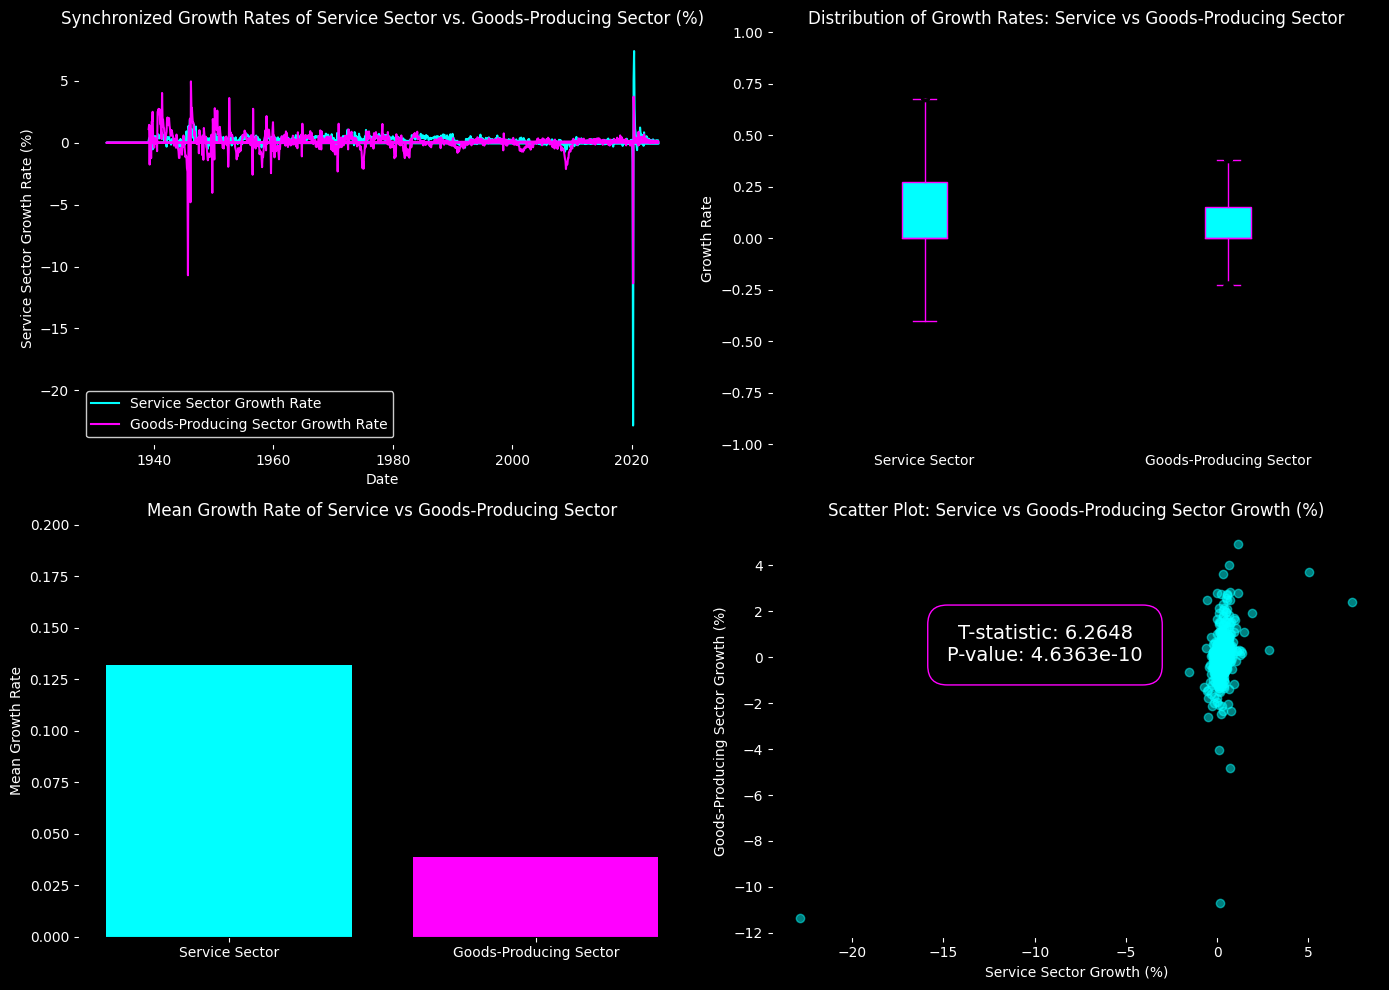

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Sample data for service and goods sector (replace with actual data)
dates = service_data['date']  # assuming you've already parsed the date
service_growth = service_data['growth_rate'] * 100  # converting to percentage
goods_growth = goods_data['growth_rate'] * 100  # converting to percentage

# Set up the overall figure size and layout (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(14, 10), facecolor='black')

# Set a dark background for all subplots
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['savefig.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'

# 1. Dual Axis Line Plot
ax1 = axs[0, 0]
ax1.plot(dates, service_growth, label="Service Sector Growth Rate", color="#00FFFF")
ax1.plot(dates, goods_growth, label="Goods-Producing Sector Growth Rate", color="#FF00FF")  # Changed to magenta
ax1.set_xlabel('Date', color='white')
ax1.set_ylabel('Service Sector Growth Rate (%)', color='white')
ax1.set_title('Synchronized Growth Rates of Service Sector vs. Goods-Producing Sector (%)', color='white')  # Adjusted title
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.legend(facecolor='black', edgecolor='white')

# 2. Bar Chart of Mean Growth Rates
mean_service_sector_growth = service_data['growth_rate'].mean() * 100
mean_goods_sector_growth = goods_data['growth_rate'].mean() * 100

axs[1, 0].bar(['Service Sector', 'Goods-Producing Sector'],
              [mean_service_sector_growth, mean_goods_sector_growth],
              color=['#00FFFF', '#FF00FF'])
axs[1, 0].set_title('Mean Growth Rate of Service vs Goods-Producing Sector', color='white')
axs[1, 0].set_ylabel('Mean Growth Rate', color='white')
axs[1, 0].tick_params(axis='x', colors='white')
axs[1, 0].tick_params(axis='y', colors='white')

# Adjust the tick labels
if mean_service_sector_growth < 0.5 and mean_goods_sector_growth < 0.5:
    axs[1, 0].set_ylim(0, 0.2)  # Adjust Y-limit to zoom in on smaller values
else:
    axs[1, 0].set_yticklabels([f'{int(y)}%' for y in axs[1, 0].get_yticks()])  # Correct Y-axis to percentages

# 3. Box Plot - Adjusted for better clarity
axs[0, 1].boxplot([service_growth, goods_growth], patch_artist=True,
                  boxprops=dict(facecolor='#00FFFF', color='#FF00FF'),
                  whiskerprops=dict(color='#FF00FF'), capprops=dict(color='#FF00FF'),
                  medianprops=dict(color='#FF00FF'))

# Further adjust the Y-limit for better scaling (zoom in even more)
axs[0, 1].set_ylim(-1, 1)  # Narrowing the range to better show the box plot variation
axs[0, 1].set_xticklabels(['Service Sector', 'Goods-Producing Sector'], color='white')
axs[0, 1].set_title('Distribution of Growth Rates: Service vs Goods-Producing Sector', color='white')
axs[0, 1].set_ylabel('Growth Rate', color='white')
axs[0, 1].tick_params(axis='y', colors='white')


# 4. Scatter Plot (Correlation between Growth Rates)
axs[1, 1].scatter(service_growth, goods_growth, alpha=0.5, color='#00FFFF')
axs[1, 1].set_title('Scatter Plot: Service vs Goods-Producing Sector Growth (%)', color='white')
axs[1, 1].set_xlabel('Service Sector Growth (%)', color='white')
axs[1, 1].set_ylabel('Goods-Producing Sector Growth (%)', color='white')
axs[1, 1].tick_params(axis='x', colors='white')
axs[1, 1].tick_params(axis='y', colors='white')

# T-Statistic and P-Value (Neon-styled Box)
t_stat, p_value = stats.ttest_rel(service_data['growth_rate'], goods_data['growth_rate'])

# Neon-styled box (moved down slightly to avoid overlap)
fig.text(0.75, 0.35, f'T-statistic: {t_stat:.4f}\nP-value: {p_value:.4e}', ha='center', va='center',
         fontsize=14, bbox=dict(facecolor='none', edgecolor='#FF00FF', boxstyle='round,pad=1'),
         color='white')

# Adjust layout to fit everything
plt.tight_layout()
plt.show()